<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

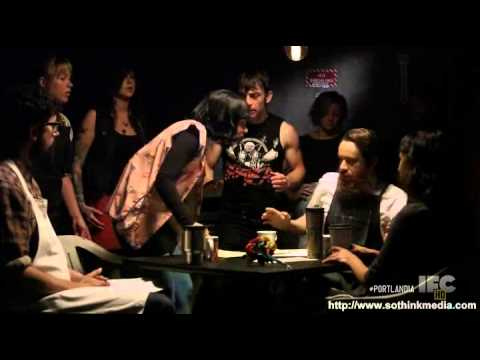

In [66]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [67]:
%pwd

'/Users/hotstuff/Documents/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [68]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [31]:
shops['star_rating'][0]

' 5.0 star rating '

In [69]:
# Start here 
shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x:x.lower())
shops['full_review_text'] = shops['full_review_text'].apply(lambda x:x.lower())
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4.0 star rating


In [70]:
reviews = shops['full_review_text'].str.split("/", n=4, expand=True)
reviews.head()

,0,1,2,3,4
0,11,25,2016 1 check-in love love loved the atmosphere...,None,None
1,12,2,"2016 listed in date night: austin, ambiance in...",None,None
2,11,30,2016 1 check-in listed in brunch spots i loved...,None,None
3,11,25,2016 very cool decor! good drinks nice seating...,None,None
4,12,3,2016 1 check-in they are located within the no...,None,None


In [71]:
reviews=shops['full_review_text'].str.split("2016", n=4, expand=True)
reviews.head()

,0,1,2
0,11/25/,1 check-in love love loved the atmosphere! ev...,None
1,12/2/,"listed in date night: austin, ambiance in aus...",None
2,11/30/,1 check-in listed in brunch spots i loved the...,None
3,11/25/,very cool decor! good drinks nice seating ho...,None
4,12/3/,1 check-in they are located within the northc...,None


In [72]:
shops['full_review_text']=reviews[1]
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,1 check-in love love loved the atmosphere! ev...,5.0 star rating
1,the factory - cafe with a soul,"listed in date night: austin, ambiance in aus...",4.0 star rating
2,the factory - cafe with a soul,1 check-in listed in brunch spots i loved the...,4.0 star rating
3,the factory - cafe with a soul,very cool decor! good drinks nice seating ho...,2.0 star rating
4,the factory - cafe with a soul,1 check-in they are located within the northc...,4.0 star rating


In [73]:
shops['star_rating'].value_counts(normalize=True)[:50]

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [74]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [54]:
def tokenize(text):
    """Parses a string into a list of semantic unites (words)
    
    Args:
        text (str): The string that functions will tokenize.
        
    Returns:
           list: tokens parsed out by the mechanics of your choice
    """
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', str(text))
    tokens = tokens.lower().split()
    
    return tokens

In [75]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [76]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [ ]:
## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [77]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 16460),
 ('and', 12725),
 ('a', 10225),
 ('i', 9181),
 ('to', 7945),
 ('of', 5626),
 ('is', 5591),
 ('was', 4930),
 ('it', 4526),
 ('coffee', 4513)]

In [78]:
#counting the raw text
shops['full_review_text'].value_counts(normalize=True)[:50]

 1 check-in listed in                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [79]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [80]:
# Use the Function
wc = count(shops['tokens'])

In [81]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
59,the,3449,16460,1.0,0.045564,0.045564,0.452862
17,and,3452,12725,2.0,0.035225,0.080789,0.453256
9,a,3046,10225,3.0,0.028304,0.109093,0.399947
3,i,2668,9181,4.0,0.025415,0.134508,0.350315
10,to,2789,7945,5.0,0.021993,0.156501,0.366203


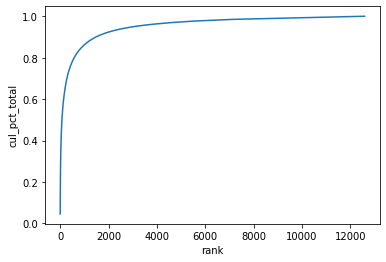

In [82]:
import seaborn as sns

#cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [83]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.3158200692041523

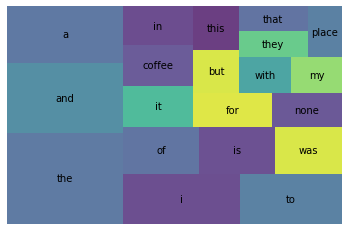

In [84]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [94]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(str(text))
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [95]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [96]:
shops['lemmas'].head()

0    [ , 1, check, love, love, love, atmosphere, co...
1    [ , list, date, night, austin, ambiance, austi...
2    [ , 1, check, list, brunch, spot, love, eclect...
3    [ , cool, decor, good, drink, nice, seating,  ...
4    [ , 1, check, locate, northcross, mall, shoppi...
Name: lemmas, dtype: object

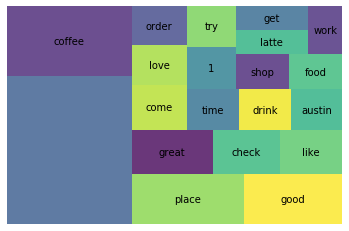

In [98]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [99]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,,3918,9902,1.0,0.056012,0.056012,0.514443
39,coffee,2366,4691,2.0,0.026535,0.082548,0.310662
80,place,1970,2993,3.0,0.016930,0.099478,0.258666
155,good,1793,2629,4.0,0.014871,0.114349,0.235425
85,great,1391,1929,5.0,0.010912,0.125261,0.182642
31,check,1477,1597,6.0,0.009034,0.134295,0.193934
165,like,1025,1476,7.0,0.008349,0.142644,0.134585
406,come,994,1347,8.0,0.007620,0.150263,0.130515
36,love,909,1170,9.0,0.006618,0.156882,0.119354
5,order,763,1159,10.0,0.006556,0.163438,0.100184


In [106]:
wc_top20.word.values

array([' ', 'coffee', 'place', 'good', 'great', 'check', 'like', 'come',
       'love', 'order', 'time', 'drink', 'austin', '1', 'try', 'shop',
       'food', 'latte', 'get', 'work'], dtype=object)

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

